In [ ]:
from sklearn.metrics import *
from tqdm import tqdm
import numpy as np
import pyvista as pv
import open3d as o3d
import shap
from sklearn.cluster import KMeans

from final_models_explainability.get_predictions import *

plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['font.size'] = 12

In [24]:
results_raw = np.load('volumes_eval.npz', allow_pickle=True)
results = {key: results_raw[key] for key in results_raw.files}

correct_indices = []

for i in range(len(results['true'])):

    if results['true'][i] == results['pred_classes'][i]:

        correct_indices.append(i)

filtered_results = {
                    'true': [results['true'][i] for i in correct_indices],
                    'pred_probs': [results['pred_probs'][i] for i in correct_indices],
                    'data': [results['data'][i] for i in correct_indices]
                }

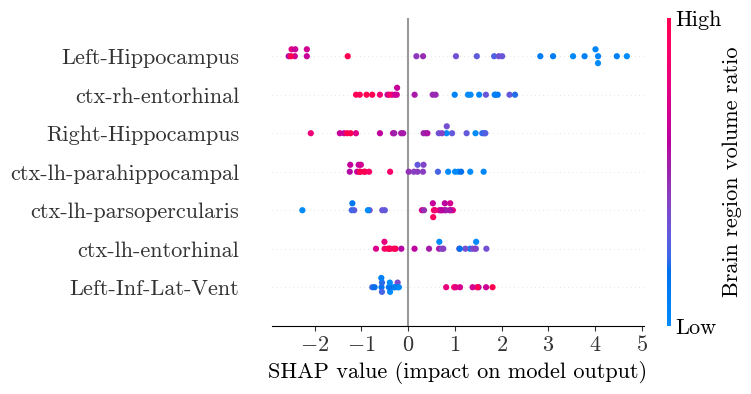

In [37]:
with open('final_models_explainability/volumes_gbdt.pkl', "rb") as f:
    model = pickle.load(f)

# Arbitrary subject for struct names
subject = Subject("mri_samples/chris_t1", None)

explainer = shap.Explainer(model, feature_names=np.array(subject.aseg_stats['StructName']))

shap_values = explainer(np.array(filtered_results['data']))

shap.plots.beeswarm(shap_values, max_display=7, group_remaining_features=False, show=False, color_bar_label="Brain region volume ratio", plot_size=(6, 4), s=20)

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)


fig = plt.gcf()
for cax in fig.axes:
    if cax.get_ylabel() == "Brain region volume ratio":
        cax.set_ylabel("Brain region volume ratio", fontsize=16)
        cax.tick_params(labelsize=16)


plt.savefig("figures/volumes_shap.png", dpi=300, bbox_inches='tight')

plt.show()

